<a href="https://colab.research.google.com/github/Fravo10/UgrMPBaseAlumnosFranBravoyPalomaRuiz/blob/main/Motivational_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car sales example

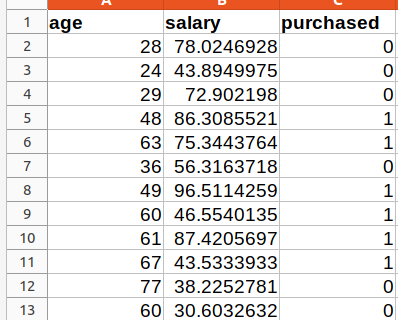

# Logistic regression

Unlike linear regression, we predict only 2 discrete values: 0 or 1. Therefore, we refer to logistic regression as a so-called **classification algorithm**.

Don't be fooled by the word regression, it's named that way for some historical reasons.

##Hypothesis

$$ h_\theta(x) = g(\theta^Tx) $$

Where θ is transposed vector of thetas, and X is a feature vector, and g is **sigmoid function**.


## Sigmoid function

$$ g(z) = \frac{1}{1+e^{-z}} $$

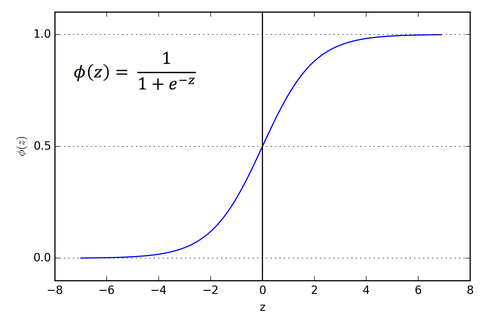

### therefore

$$  h_\theta(x) = \frac{1}{1+e^{-θ^Tx}} $$




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import math

math.e # hint: euler's number

def sigmoid(z):
  # Try to implement on your own
  return 1 / (1 + math.e ** -z )

In [ ]:
!pip install pandas

## Get data

In [ ]:
!wget -O data.csv https://mta.pef.mendelu.cz/~xvalovic/vyuka/nsa/car_sales_data.csv

--2025-09-23 05:23:12--  https://mta.pef.mendelu.cz/~xvalovic/vyuka/nsa/car_sales_data.csv
Resolving mta.pef.mendelu.cz (mta.pef.mendelu.cz)... 195.178.74.3
Connecting to mta.pef.mendelu.cz (mta.pef.mendelu.cz)|195.178.74.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>]   2.17K  --.-KB/s    in 0s      

2025-09-23 05:23:13 (149 MB/s) - ‘data.csv’ saved [2218/2218]



In [ ]:
### Pandas library is a great tool to handle data files
import pandas as pd
data = pd.read_csv('data.csv', delimiter=';')

data # Show first 10 rows of file

,age,salary,purchased
0,28,78.024693,0
1,24,43.894998,0
2,29,72.902198,0
3,48,86.308552,1
4,63,75.344376,1
...,...,...,...
95,66,48.380286,1
96,34,87.103851,1
97,79,68.775409,1
98,44,64.931938,1


In [ ]:
X = data.iloc[:, :2]            # Select features columns (independent variable)
Y = data.iloc[:, 2]             # Select label - dependent variable

m = len(Y)                      # Number of samples
X = X.to_numpy()                # Turn columns into numpy 2d array
Y = Y.to_numpy()


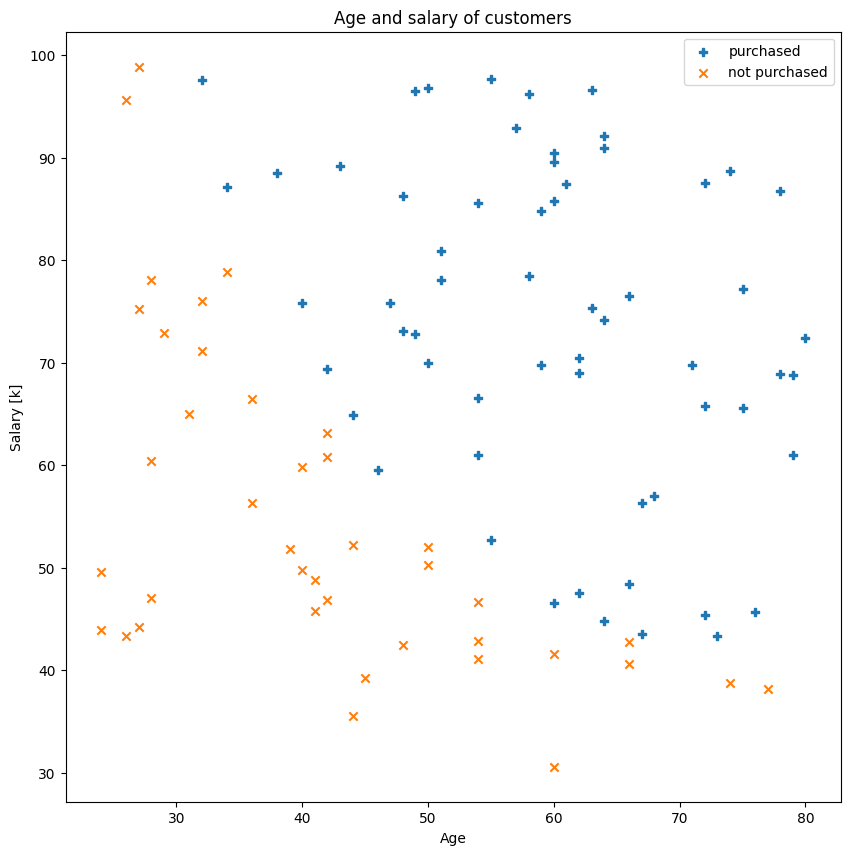

In [ ]:
import matplotlib.pyplot as plt

labels = Y
plt.figure(figsize=(10,10))
plt.scatter(X[np.where(labels==1),0], X[np.where(labels==1),1], label='purchased', marker='P')
plt.scatter(X[np.where(labels==0),0], X[np.where(labels==0),1], label='not purchased', marker='x')
plt.legend()
plt.title('Age and salary of customers')
plt.xlabel('Age')
plt.ylabel('Salary [k]')
plt.show()

## Cost function


$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{i} y^{(i)} log(h_\theta(x^{(i)})) + (1-y^{(i)}) log(1-h_\theta(x^{(i)}))$$

As always, our goal is to **minimize** the value of J(θ)!


In [ ]:
#np.transpose(X) == X.T

In [ ]:
### Initial theta
number_of_features = X.shape[1] +1
initial_theta = np.zeros((number_of_features, 1)) # Why [3 x 1] when we have only 2 features?

def costFunction(theta, X, Y):
  ### Add new column of ones into X (to allow calculate dot product)
  ones = np.ones((len(X), 1))
  X_ones = np.append(ones, X, axis=1)

  grad = np.zeros((len(X), 1))

  argument = np.dot(theta.T, X_ones.T)    # [1x3] * [3x100] = [1x100]

  h_x = sigmoid(argument)

  # J = (-1/m) * ( np.dot( Y.T, np.log(h_x.T) ) + np.dot( (1-Y).T, np.log(1-h_x.T) ) )  # [1x100] * [100x1] + [1x100] * [100x1]
  ### Or alternatively
  A = np.dot( Y.T, np.log(h_x.T) )                  # [1x100] * [100x1]
  B = np.dot( (1-Y).T, np.log(1-h_x.T) )            # [1x100] * [100x1]
  J = (-1/m) * (A+B)                                # [1]
  return J


costFunction(theta=initial_theta, X=X, Y=Y)

array([0.69314718])

## Gradient descent

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0..\theta_n) $$

Parital derrivative of θj:

$$ \frac{\partial}{\partial \theta_j} J(\theta_0..\theta_n) = \sum_{m}^{i=1} ( h_\theta(x^{(i)}) - y^{(i)}) x_j $$

We have to do this **simultaneously** for each feature, thus each theta.

One could say that the formula is exactly the same as the GD formula for linear regression. And it is true. Visually.

The only difference is in hypothesis function. In linear reg. we had:

$$ h_\theta(x) = \theta^T x $$

but in logistic regression we have:

$$  h_\theta(x) = \frac{1}{1+e^{-θ^Tx}} $$

In [ ]:
def gradient(theta, X, Y):
  ones = np.ones((len(X), 1))
  X_ones = np.append(ones, X, axis=1)

  argument = np.dot(theta.T, X_ones.T)
  h_x = sigmoid(argument)
  return (1/m) * np.dot((h_x - Y.T), X_ones)

### Initial theta
number_of_features = X.shape[1] +1
initial_theta = np.zeros((number_of_features, 1))

gradient(initial_theta, X, Y)

array([[ -0.1       ,  -9.57      , -11.26284221]])

In [ ]:
initial_theta.flatten()

array([0., 0., 0.])

In [ ]:
### This little magic here finds global minima of cost function and returns optimal Theta
import scipy.optimize as op

r = op.minimize(
    fun = costFunction,
    x0 = initial_theta.flatten(),
    args = (X, Y),
    method = 'TNC',
    jac = gradient
)

print(r)
theta = r.x

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.20441791307021384
       x: [-2.562e+01  2.624e-01  2.049e-01]
     nit: 18
     jac: [-7.994e-05 -2.317e-05 -5.483e-04]
    nfev: 41


In [ ]:
theta

array([-25.61737372,   0.26242414,   0.20493367])

### Decision boundary

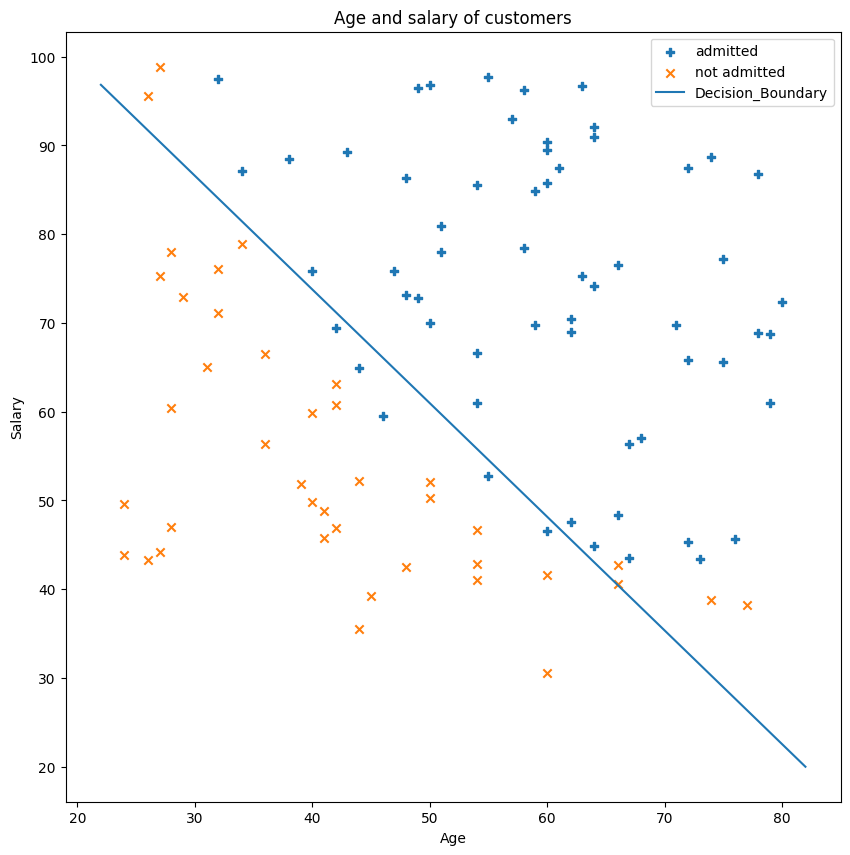

In [ ]:
import matplotlib.pyplot as plt

# getting the x co-ordinates of the decision boundary
decision_x = np.array([min(X[:,0]) - 2, max(X[:,0]) + 2])
decision_y = (-1/theta[2]) * (theta[1] * decision_x + theta[0])


labels = Y
plt.figure(figsize=(10,10))
plt.scatter(X[np.where(labels==1),0], X[np.where(labels==1),1], label='admitted', marker='P')
plt.scatter(X[np.where(labels==0),0], X[np.where(labels==0),1], label='not admitted', marker='x')
plt.plot(decision_x, decision_y, label = "Decision_Boundary")       # plot boundary
plt.legend()
plt.title('Age and salary of customers')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [ ]:
age = 70
salary = 10

vector = np.array([1, age, salary])
h_x = np.dot(vector, theta.T)
sig = sigmoid(h_x)                   # ... your code here: use hypothesis as input for sigmoid function. How to interprate result of this function?

print(f'Customer of age {age} with salary {salary} purchase new with probability {sig*100.:2f}%')

Customer of age 70 with salary 10 purchase new with probability 0.549532%
